# Why are the most painted pixels the most painted?

### First, what are the most painted pixels?
It is important to note that the original canvas started at 1000x1000, then later expanded throughout the event to a final size of 2000x2000. The most painted pixels should likely be within the original canvas.

In [12]:
import duckdb
import matplotlib.pyplot as plt

conn = duckdb.connect()

# top 10 most painted pixels
query = """
    WITH pixels AS (
        SELECT
            coordinate,
            COUNT(*) AS num_placements
        FROM '../2022_place_canvas_history.parquet'
        GROUP BY coordinate
    )
    SELECT coordinate, num_placements
    FROM pixels
    ORDER BY num_placements DESC
    LIMIT 10
"""
 
res = conn.execute(query).df()
print(f"Top 10 painted pixels:\n{res}\n")

Top 10 painted pixels:
  coordinate  num_placements
0        0,0           98807
1    359,564           69198
2    349,564           55230
3    859,766           52261
4    860,766           51485
5    104,768           38086
6    105,768           34082
7  1999,1999           31437
8     1999,0           30882
9    633,728           30752



Immediately, we can see (0,0) was way more popular than the following, earning the top spot by 29609 more placements. This is more than double the difference between the next two coordinates. 
We also can note that the 2nd and 3rd coordinates, (359,564) and (349,564), are right next to eachother. **What was happening there that caused so many people to paint pixels in those spots?** And **Why wasn't the most painted pixel there, too?**

### (359,564) and (349,564):
#### What was happening around the 2nd and 3rd most painted pixels?
<div>
<img style="float: left; margin: 20px" src="onepiece-pirate.png" width="200"/>
</div>

<br>
The image on the left shows pixels (330,528) to (378,613) on Mon, April 4th 2022 at 19:00:00 GMT, with (349,564) and (359,564) being in the center of the eyes of the skull. The image is of the symbol of the Straw Hat Pirates from the manga and anime series One Piece. This image stayed consistent throughout most of the event. 

Note that (359,564) is painted light blue, and (349,564) black. Even though (349,564) is painted black in this image, there is also light blue within the rest of the eye. **Why was light blue painted in both eyes?** Was this intentional?

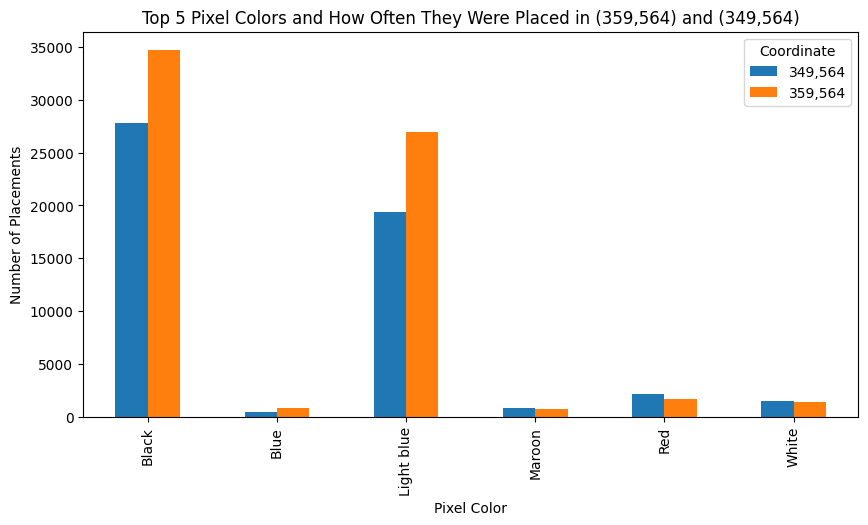

In [7]:
plt.rcParams['figure.figsize'] = [10, 5]

query = """
    SELECT
        pixel_color, coordinate, count(pixel_color) as cnt
    FROM '../2022_place_canvas_history.parquet'
    WHERE coordinate IN ('359,564', '349,564')
    GROUP BY pixel_color, coordinate
    HAVING cnt > 400
    ORDER BY cnt DESC
"""

df = conn.execute(query).df()
df = df.pivot(index='pixel_color', columns='coordinate', values='cnt')
df.plot(kind='bar', stacked=False, title='Top 5 Pixel Colors and How Often They Were Placed in (359,564) and (349,564)')
plt.xlabel('Pixel Color')
plt.ylabel('Number of Placements')
plt.legend(title='Coordinate')
plt.show()

The graph above shows the number of pixels painted in (349,564) and (359,564) by color, highlighting colors that were painted more than 400 times. As expected, the most painted color for both eyes was black. And the second, light blue. It is especially important to note how (359,564), the right eye, was painted much more often than the left.

#### Why were the eyes painted light blue? And why was the right eye painted so much more than the left?
Multiple reddit users on r/OnePiece explained this was from efforts to make the skull resemble Sans, a skeleton character from the video game Undertale [1]:
<div>
<img src="r-onepiece-sans-1.png" width="700"/>
<img src="r-onepiece-sans-2.png" width="750"/>
</div>

Though the users could not agree on whether or not they adequately defended the skull, we can see that they were defending from the Undertale fans attempting to turn their Straw Hat Pirates symbol into Sans.

For reference, Sans from Undertale [2] and the Straw Hat Pirates Flag from OnePiece [3]:
<div>
<img src="sans-blue-eye.jpg" width="150"/>
<img src="straw-hat-pirates.png" width="280"/>
</div>

#### Why did this particular piece of art, and these eyes, have so much traffic?
For one, One Piece has an extremely large fandom, even the reddit post in r/OnePiece organizing the Straw Hat Pirates flag had 3.6k upvotes and 3k comments alone. Also note that the Straw Hat Pirates flag stayed throughout the majority of the event, albiet with minor changes.
It is common knowledge that r/place 2022 was filled with trolls and those who wanted to cover art with their own, but the One Piece community was dedicated to keeping their beloved flag safe.

### (0,0):
#### What was happening around (0,0)?
![runescape-connection.png](runescape-connection.png)

This shows how the top corner, from (0,0) to (231,33), throughout the event. The image shows this corner of the canvas on Sat, April 2nd 2022 at 09:30:00 GMT. This was based on a notification that appears in Old School RuneScape. Many redditors, RuneScape enjoyers and not, placed pixels in this image. However, none of the other pixels in this image were among the most painted pixels. 

#### Why was (0,0) painted so much more than the pixels around it?
To get a better idea of what was happening, below shows every color that was placed in that position.

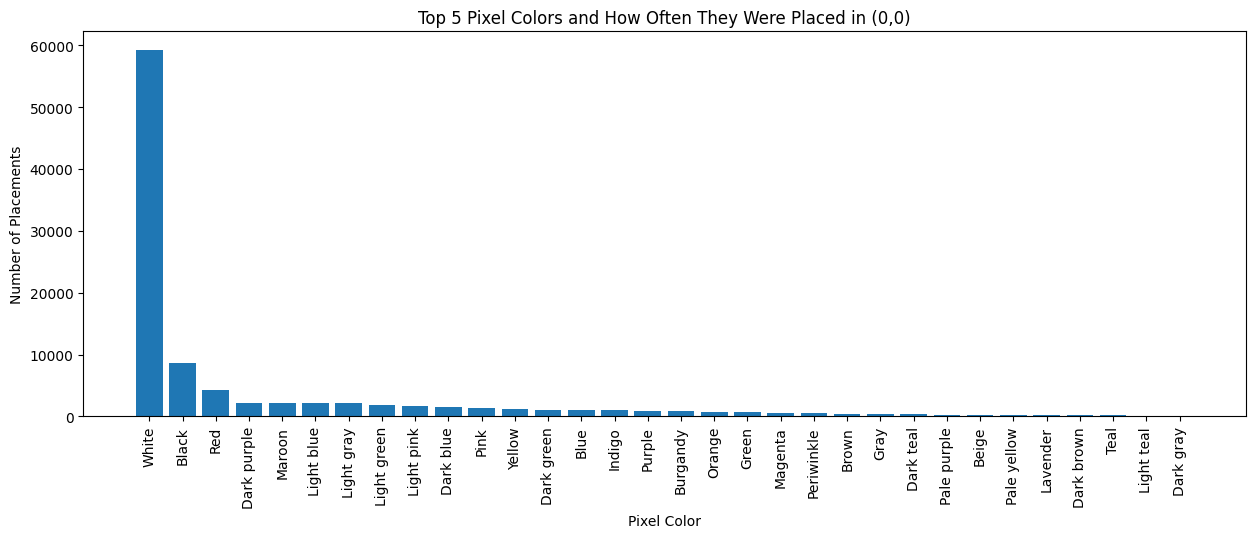

In [3]:
plt.rcParams['figure.figsize'] = [15, 5]

query = """
    SELECT
        pixel_color, count(pixel_color) as cnt
    FROM '../2022_place_canvas_history.parquet'
    WHERE coordinate = '0,0'
    GROUP BY pixel_color
    ORDER BY cnt DESC
"""

df = conn.execute(query).df()
plt.bar(x=df['pixel_color'], height=df['cnt'])
plt.xlabel('Pixel Color')
plt.xticks(rotation=90)
plt.ylabel('Number of Placements')
plt.title('Top 5 Pixel Colors and How Often They Were Placed in (0,0)')
plt.show()

As we can see, white dominated in the total number of placements. Likely due to it being the color of the "Connection lost ..." border. Besides that, almost every color was placed much less.

In [89]:
query = """
    WITH placements AS (
        SELECT
            coordinate,
            user_uniq_id,
            COUNT(*) AS user_placements
        FROM '../2022_place_canvas_history.parquet'
        WHERE coordinate = '0,0'
            AND pixel_color = 'White'
        GROUP BY user_uniq_id, coordinate
    )
    SELECT
        coordinate,
        COUNT(user_uniq_id) AS repeat_users,
        SUM(user_placements) AS repeat_placements
    FROM placements
    WHERE user_placements > 1
    GROUP BY coordinate
    ORDER BY repeat_users DESC
"""

df = conn.execute(query).df()
print(df)

  coordinate  repeat_users  repeat_placements
0        0,0          5787            14666.0


Here we see that 14,666 white pixel placements were done by almost 6000 users. This covers about a quarter of all white pixel placements at (0,0). This helps with the conclusion that the white pixel placements were from users trying to save the connection lost banner.
However, **why were so many of the other pixel placements such a wide variety of colors?**

#### Who was placing a bunch of random colors at (0,0) and why?
First, let's dive into who was placing those pixels.

In [98]:
query = """
    SELECT
        COUNT(DISTINCT user_uniq_id) AS total_distinct_users,
        COUNT(*) AS user_placements
    FROM '../2022_place_canvas_history.parquet'
    WHERE coordinate = '0,0'
        AND pixel_color != 'White'
    ORDER BY total_distinct_users DESC
"""

df = conn.execute(query).df()
print(df)

   total_distinct_users  user_placements
0                 35127            39525


Of the 98807 pixel placements at (0,0), 39525 were colors other than white. It is also important to note that a majority of those placements, 88.87%, were done by distinct users. Unlike the situation with r/OnePiece and Undertale, this was not a turf war.

Looking back at the top 10 pixels, two other corners, (1999,1999) and (1999,0), were in spots 7 and 8.

In [111]:
query = """
    WITH users AS (
        SELECT DISTINCT
            user_uniq_id, coordinate
        FROM '../2022_place_canvas_history.parquet'
        WHERE coordinate IN ('0,0', '1999,1999', '1999,0')
    )
    SELECT COUNT(*) AS total_users
    FROM (
        SELECT user_uniq_id
        FROM users
        GROUP BY user_uniq_id
        HAVING COUNT(DISTINCT coordinate) = 3
    )
"""
df = conn.execute(query).df()
print(df)

   total_users
0          190


However, only 190 people placed in three of the corners. Thus, this cannot be the organized effort. The only reasonable conclusions we have left are (0,0) consist of first time users, bots, and/or trolls.
Let's check first time users!

In [112]:
query = """
    WITH first AS (
        SELECT
            user_uniq_id,
            MIN(timestamp) AS first_pixel
        FROM '../2022_place_canvas_history.parquet'
        GROUP BY user_uniq_id
    )
    SELECT COUNT(*) AS users
    FROM '../2022_place_canvas_history.parquet' c
    INNER JOIN first f
        ON c.user_uniq_id = f.user_uniq_id
        AND c.timestamp = f.first_pixel
    WHERE c.coordinate = '0,0'
"""
df = conn.execute(query).df()
print(df)

   users
0   8414


There are a lot more first time users than users placing pixels in three of the most popular corners, but 8414 is still a very small amount of first time users. 
Therefore, the ridiculous number of pixel placements at (0,0) must be due to bots and/or trolls.

### Conclusion
Though we cannot get into the minds of the reddit users placing the pixels, we can get a good idea of the story behind each of these pixels, and why the top painted ones are the top painted ones.

### References:
1) https://www.reddit.com/r/OnePiece/comments/ttq6r4/lets_put_ronepiece_in_rplace/
2) https://undertale.fandom.com/wiki/Sans
3) https://onepiece.fandom.com/wiki/Straw_Hat_Pirates
4) https://2022.place-atlas.stefanocoding.me/#/157/417/549/2.229
5) r/place 2022 canvas history